In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

#importo libreria panda per leggere ed elaborare csv
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)


#data=pd.read_csv('/Users/sgira/Downloads//ProgettoMLDM-main (5)/dataset_clean.csv')
train_data=pd.read_csv('/Users/sgira/Downloads/ProgettoMLDM/ProgettoMLDM-main/Dataset/train_data.csv')
test_data=pd.read_csv('/Users/sgira/Downloads/ProgettoMLDM/ProgettoMLDM-main/Dataset/test_data.csv')
y_train=pd.read_csv('/Users/sgira/Downloads/ProgettoMLDM/ProgettoMLDM-main/Dataset/train_y.csv')
y_test=pd.read_csv('/Users/sgira/Downloads/ProgettoMLDM/ProgettoMLDM-main/Dataset/test_y.csv')


In [2]:
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [4]:
LinSVM = Pipeline([
    ('scaler', StandardScaler()),
    ('linsvc', LinearSVC())],
    verbose=True)
LinSVM.fit(train_data, np.ravel(y_train))
LinSVM.score(test_data, np.ravel(y_test))

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ............ (step 2 of 2) Processing linsvc, total= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7771821828745331

Test

In [5]:
parameters = {
    "linsvc__C": [0.001,0.1,1,5,10],
    "linsvc__tol" : [1e-5,1e-3,1e-1],
    "linsvc__penalty": ['l2'],
    "linsvc__loss" : ['squared_hinge'],
    "linsvc__dual": [False],
    "linsvc__max_iter": [20000],
    }



# Creo il dizionario di scoring
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Esecuzione della GridSearchCV
best_linsvc = GridSearchCV(
    estimator=LinSVM,
    param_grid=parameters,
    cv=2,
    verbose=10,
    scoring=SCORING,
    return_train_score=True,
    refit="accuracy",
    n_jobs=-1,
)


best_linsvc.fit(train_data,np.ravel(y_train))

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............ (step 2 of 2) Processing linsvc, total=   0.2s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linsvc', LinearSVC())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'linsvc__C': [0.001, 0.1, 1, 5, 10],
                         'linsvc__dual': [False],
                         'linsvc__loss': ['squared_hinge'],
                         'linsvc__max_iter': [20000], 'linsvc__penalty': ['l2'],
                         'linsvc__tol': [1e-05, 0.001, 0.1]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro'},
             verbose=10)

In [6]:
linsvc_clf = best_linsvc.best_estimator_
print(linsvc_clf)
linsvc_clf.score(test_data,np.ravel(y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('linsvc',
                 LinearSVC(C=0.001, dual=False, max_iter=20000, tol=0.1))],
         verbose=True)


0.7771475999446673

In [3]:
SVM = Pipeline([
    ('scaler', StandardScaler()),
    ("svc", SVC(cache_size=2000))],
    verbose=True)
SVM.fit(train_data, np.ravel(y_train))
SVM.score(test_data, np.ravel(y_test))

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing svc, total=20.7min


0.8518121455249689

In [7]:
SVM_result = []
for k in ['rbf','poly','sigmoid']:
      SVM = Pipeline([
          ('scaler', StandardScaler()),
          ('svc', SVC(kernel=k,
                      cache_size=2000))],
          verbose=True)
      SVM.fit(train_data, np.ravel(y_train))
      score = SVM.score(test_data, np.ravel(y_test))
      SVM_result.append([f'SVM(kernel={k})', score])
      print(f'SVM(kernel={k}) : {score}')

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing svc, total=16.1min
SVM(kernel=rbf) : 0.8502213307511413
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=12.6min
SVM(kernel=poly) : 0.850843823488726
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=23.2min
SVM(kernel=sigmoid) : 0.6652026559690137


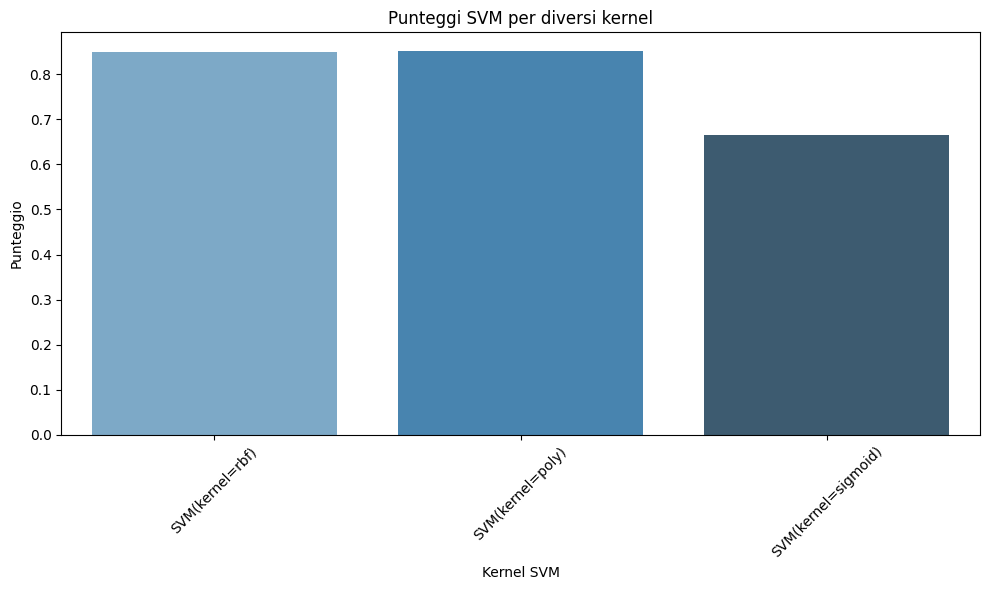

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# I punteggi ottenuti per i diversi kernel SVM
kernel_names = [item[0] for item in SVM_result]
scores = [item[1] for item in SVM_result]

# Creazione del barplot utilizzando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=kernel_names, y=scores, palette="Blues_d")
plt.title("Punteggi SVM per diversi kernel")
plt.xlabel("Kernel SVM")
plt.ylabel("Punteggio")
plt.xticks(rotation=45)  # Ruota le etichette sull'asse x per una migliore leggibilità

# Mostra il grafico
plt.tight_layout()
plt.show()







In [9]:
SVM = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())])

parameters = {
    "svc__C":[0.01,10,50,100,200],
    # "svc__degree":[3,5,7],
    "svc__kernel": ['rbf'],
    # "svc__gamma" : ['scale','auto'],
    # "svc__tol" : [1e-3,1e-4,1e-5],
    # "svc__max_iter": [500,1000],
    # "svc__max_iter": [2000],
    "svc__cache_size": [200],
    }


# Create Stratified folds
# cross_validation = StratifiedKFold(n_splits=2)
# cross_validation.get_n_splits(dataset, train_target)

# Create the scoring dictionary
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Create and fit the GridSearchCV for randomtree
best_svc = RandomizedSearchCV(
    estimator=SVM,
    param_distributions=parameters,
    n_iter=15,
    cv=2,
    verbose=10,
    scoring=SCORING,
    refit="accuracy",
    n_jobs=-1,
)


best_svc.fit(train_data,np.ravel(y_train))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=15. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 2/2; 4/4] START svc__C=15, svc__cache_size=200, svc__kernel=rbf, svc__max_iter=20000
[CV 2/2; 4/4] END svc__C=15, svc__cache_size=200, svc__kernel=rbf, svc__max_iter=20000; accuracy: (test=0.855) balanced_accuracy: (test=0.735) f1: (test=0.769) total time= 1.6min
[CV 2/2; 1/4] START svc__C=0.5, svc__cache_size=200, svc__kernel=rbf, svc__max_iter=20000
[CV 2/2; 1/4] END svc__C=0.5, svc__cache_size=200, svc__kernel=rbf, svc__max_iter=20000; accuracy: (test=0.798) balanced_accuracy: (test=0.609) f1: (test=0.623) total time= 1.7min
[CV 1/2; 2/4] START svc__C=5, svc__cache_size=200, svc__kernel=rbf, svc__max_iter=20000
[CV 1/2; 2/4] END svc__C=5, svc__cache_size=200, svc__kernel=rbf, svc__max_iter=20000; accuracy: (test=0.855) balanced_accuracy: (test=0.729) f1: (test=0.765) total time= 1.7min
[CV 2/2; 1/5] START svc__C=0.01, svc__cache_size=200, svc__kernel=rbf...........
[CV 2/2; 1/5] END svc__C=0.01, svc__cache_size=200, svc

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc', SVC())]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'svc__C': [0.01, 10, 50, 100, 200],
                                        'svc__cache_size': [200],
                                        'svc__kernel': ['rbf']},
                   refit='accuracy',
                   scoring={'accuracy': 'accuracy',
                            'balanced_accuracy': 'balanced_accuracy',
                            'f1': 'f1_macro'},
                   verbose=10)

In [10]:
print(best_svc.best_estimator_)
best_svc.score(test_data,np.ravel(y_test))

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])


0.8640545026974685

In [7]:
SVM = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())])

parameters = {
    "svc__C":[0.5,5,10,15],
    # "svc__degree":[3,5,7],
    "svc__kernel": ['rbf'],
    # "svc__gamma" : ['scale','auto'],
    # "svc__tol" : [1e-3,1e-4,1e-5],
    # "svc__max_iter": [500,1000],
    "svc__max_iter": [20000],
    "svc__cache_size": [200],
    }

# Create the scoring dictionary
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Create and fit the GridSearchCV for randomtree
best_svc = GridSearchCV(
    estimator=SVM,
    param_grid=parameters,
    cv=2,
    verbose=10,
    scoring=SCORING,
    refit="accuracy",
    n_jobs=-1,
)


best_svc.fit(train_data,np.ravel(y_train))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_it

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 5, 10, 15], 'svc__cache_size': [200],
                         'svc__kernel': ['rbf'], 'svc__max_iter': [20000]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro'},
             verbose=10)

In [8]:
print(best_svc.best_estimator_)
best_svc.score(test_data,np.ravel(y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=10, max_iter=20000))])


0.812595103057131

In [10]:



SVM = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())])

parameters = {

    "svc__C":[10],
    "svc__degree":[3,5,7], #Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.
    "svc__kernel": ['poly'],
    "svc__gamma" : ['scale','auto'],
    "svc__tol" : [1e-3,1e-4,1e-5],
    "svc__max_iter": [2000],
    "svc__cache_size": [2000],
    }


# Create the scoring dictionary
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Create and fit the GridSearchCV for randomtree
best_svc = RandomizedSearchCV(
    estimator=SVM,
    param_distributions=parameters,
    n_iter=20,
    cv=2,
    verbose=10,
    scoring=SCORING,
    refit="accuracy",
    n_jobs=4,
)


best_svc.fit(train_data, np.ravel(y_train))

Fitting 2 folds for each of 18 candidates, totalling 36 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminat

[CV 2/2; 2/18] START svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.0001
[CV 2/2; 2/18] END svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.0001; accuracy: (test=0.264) balanced_accuracy: (test=0.493) f1: (test=0.233) total time=   5.3s
[CV 2/2; 4/18] START svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001
[CV 2/2; 4/18] END svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001; accuracy: (test=0.264) balanced_accuracy: (test=0.493) f1: (test=0.233) total time=   5.3s


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/2; 1/18] START svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001
[CV 2/2; 1/18] END svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001; accuracy: (test=0.264) balanced_accuracy: (test=0.493) f1: (test=0.233) total time=   5.3s
[CV 1/2; 3/18] START svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=1e-05
[CV 1/2; 3/18] END svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=1e-05; accuracy: (test=0.262) balanced_accuracy: (test=0.477) f1: (test=0.237) total time=   5.4s
[CV 1/2; 2/18] START svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.0001
[CV 1/2; 2/18] END svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=scale, svc__kernel=poly, svc__max_iter=20

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2; 1/18] START svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001
[CV 1/2; 1/18] END svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001; accuracy: (test=0.262) balanced_accuracy: (test=0.477) f1: (test=0.237) total time=   5.3s
[CV 2/2; 3/18] START svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=1e-05
[CV 2/2; 3/18] END svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=1e-05; accuracy: (test=0.264) balanced_accuracy: (test=0.493) f1: (test=0.233) total time=   5.3s
[CV 1/2; 5/18] START svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.0001
[CV 1/2; 5/18] END svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2; 5/18] START svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.0001
[CV 2/2; 5/18] END svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.0001; accuracy: (test=0.264) balanced_accuracy: (test=0.493) f1: (test=0.233) total time=   5.3s
[CV 2/2; 7/18] START svc__C=10, svc__cache_size=2000, svc__degree=5, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001
[CV 2/2; 7/18] END svc__C=10, svc__cache_size=2000, svc__degree=5, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001; accuracy: (test=0.247) balanced_accuracy: (test=0.499) f1: (test=0.200) total time=   6.1s
[CV 1/2; 6/18] START svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000, svc__tol=1e-05
[CV 1/2; 6/18] END svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2; 7/18] START svc__C=10, svc__cache_size=2000, svc__degree=5, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001
[CV 1/2; 7/18] END svc__C=10, svc__cache_size=2000, svc__degree=5, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001; accuracy: (test=0.248) balanced_accuracy: (test=0.497) f1: (test=0.204) total time=   5.9s
[CV 1/2; 9/18] START svc__C=10, svc__cache_size=2000, svc__degree=5, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=1e-05
[CV 1/2; 9/18] END svc__C=10, svc__cache_size=2000, svc__degree=5, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=1e-05; accuracy: (test=0.248) balanced_accuracy: (test=0.497) f1: (test=0.204) total time=   5.9s
[CV 2/2; 6/18] START svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000, svc__tol=1e-05
[CV 2/2; 6/18] END svc__C=10, svc__cache_size=2000, svc__degree=3, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2

[CV 1/2; 10/18] START svc__C=10, svc__cache_size=2000, svc__degree=5, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001
[CV 1/2; 10/18] END svc__C=10, svc__cache_size=2000, svc__degree=5, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001; accuracy: (test=0.248) balanced_accuracy: (test=0.497) f1: (test=0.204) total time=   5.9s
[CV 1/2; 12/18] START svc__C=10, svc__cache_size=2000, svc__degree=5, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000, svc__tol=1e-05
[CV 1/2; 12/18] END svc__C=10, svc__cache_size=2000, svc__degree=5, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000, svc__tol=1e-05; accuracy: (test=0.248) balanced_accuracy: (test=0.497) f1: (test=0.204) total time=   5.8s
[CV 2/2; 13/18] START svc__C=10, svc__cache_size=2000, svc__degree=7, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001
[CV 2/2; 13/18] END svc__C=10, svc__cache_size=2000, svc__degree=7, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2; 11/18] START svc__C=10, svc__cache_size=2000, svc__degree=5, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.0001
[CV 1/2; 11/18] END svc__C=10, svc__cache_size=2000, svc__degree=5, svc__gamma=auto, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.0001; accuracy: (test=0.248) balanced_accuracy: (test=0.497) f1: (test=0.204) total time=   5.9s
[CV 1/2; 13/18] START svc__C=10, svc__cache_size=2000, svc__degree=7, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001
[CV 1/2; 13/18] END svc__C=10, svc__cache_size=2000, svc__degree=7, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=0.001; accuracy: (test=0.267) balanced_accuracy: (test=0.493) f1: (test=0.239) total time=   6.0s
[CV 1/2; 15/18] START svc__C=10, svc__cache_size=2000, svc__degree=7, svc__gamma=scale, svc__kernel=poly, svc__max_iter=2000, svc__tol=1e-05
[CV 1/2; 15/18] END svc__C=10, svc__cache_size=2000, svc__degree=7, svc__gamma=scale, svc__kernel=poly, svc__max_it

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc', SVC())]),
                   n_iter=20, n_jobs=4,
                   param_distributions={'svc__C': [10],
                                        'svc__cache_size': [2000],
                                        'svc__degree': [3, 5, 7],
                                        'svc__gamma': ['scale', 'auto'],
                                        'svc__kernel': ['poly'],
                                        'svc__max_iter': [2000],
                                        'svc__tol': [0.001, 0.0001, 1e-05]},
                   refit='accuracy',
                   scoring={'accuracy': 'accuracy',
                            'balanced_accuracy': 'balanced_accuracy',
                            'f1': 'f1_macro'},
                   verbose=10)

In [11]:
print(best_svc.best_estimator_)
best_svc.score(test_data,np.ravel(y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=10, cache_size=2000, kernel='poly', max_iter=2000))])


0.25159081477382766